## Topik: Content Based Image Retrieval (CBIR) on Apparel

*   Nama: Devanis Dwi Sutrisno
*   Kelas: Temu Kembali Citra 7A
*   NIM: 201910370311078

Detail Project:
1.   Paper Reference: http://jurnal.una.ac.id/index.php/jurti/article/view/2021/1681
2.   Dataset: dataset primer yang diambil dari situs https://www.hijup.com/
     *   Jenis: Gamis dan Blouse 
     *   Warna: Navy dan Merah
     *   Total: 120 Citra (masing-masing 30 citra untuk setiap jenis dan warna)

**Note**:
Penggunaan dataset yang berbeda dengan paper rujukan dikarenakan dataset tersebut tidak bersifat publik dan situs yang digunakan telah nonaktif. Maka dari itu, saya melakukan pengumpulan dataset secara mandiri yang masih sesuai dengan kriteria dataset paper rujukan. Namun, sedikit terkendala untuk pengumpulan dataset _class_ outerware yang sulit ditemukan. 










## Load Library

In [1]:
# for preprocessing & models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

# for everything else
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import h5py

## Feature Extraction

In [2]:
class FeatureExtractor:
    def __init__(self):
        base_model = VGG16(weights='imagenet')
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

    def extract(self, img):
        img = img.resize((224, 224))
        img = img.convert('RGB')
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [3]:
fe = FeatureExtractor()
features = []
img_paths = []
for feature_path in Path("/content/drive/MyDrive/Classroom/TKC/feature").glob("*.npy"):
    features.append(np.load(feature_path))
    img_paths.append(Path("/content/drive/MyDrive/Classroom/TKC/busana_muslim") / (feature_path.stem + ".jpg"))
features = np.array(features)

In [20]:
for img_path in sorted(Path("/content/drive/MyDrive/Classroom/TKC/busana_muslim").glob("*.jpg")):
    print(img_path)
    feature = fe.extract(img=Image.open(img_path))
    feature_path = Path("/content/drive/MyDrive/Classroom/TKC/feature") / (img_path.stem + '.npy')
    np.save(feature_path, feature)

/content/drive/MyDrive/Classroom/TKC/busana_muslim/blus_merah_1.jpg
/content/drive/MyDrive/Classroom/TKC/busana_muslim/blus_merah_10.jpg
/content/drive/MyDrive/Classroom/TKC/busana_muslim/blus_merah_11.jpg
/content/drive/MyDrive/Classroom/TKC/busana_muslim/blus_merah_12.jpg
/content/drive/MyDrive/Classroom/TKC/busana_muslim/blus_merah_13.jpg
/content/drive/MyDrive/Classroom/TKC/busana_muslim/blus_merah_14.jpg
/content/drive/MyDrive/Classroom/TKC/busana_muslim/blus_merah_15.jpg
/content/drive/MyDrive/Classroom/TKC/busana_muslim/blus_merah_16.jpg
/content/drive/MyDrive/Classroom/TKC/busana_muslim/blus_merah_17.jpg
/content/drive/MyDrive/Classroom/TKC/busana_muslim/blus_merah_18.jpg
/content/drive/MyDrive/Classroom/TKC/busana_muslim/blus_merah_19.jpg
/content/drive/MyDrive/Classroom/TKC/busana_muslim/blus_merah_2.jpg
/content/drive/MyDrive/Classroom/TKC/busana_muslim/blus_merah_20.jpg
/content/drive/MyDrive/Classroom/TKC/busana_muslim/blus_merah_21.jpg
/content/drive/MyDrive/Classroom/TKC

## Test Model & Check Euclidean Distance Score

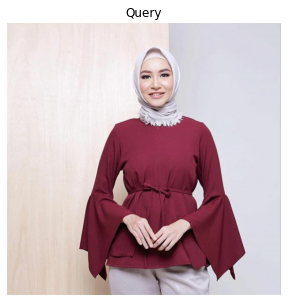

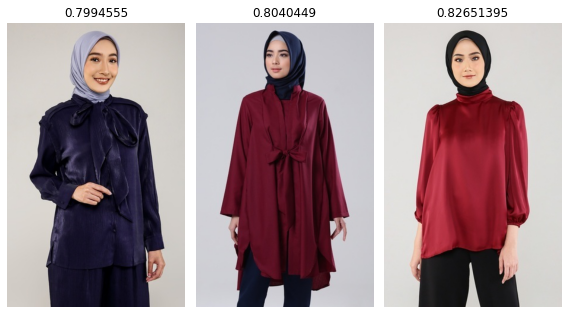

In [21]:
# Insert the image query
img = Image.open("/content/drive/MyDrive/Classroom/TKC/query/test_blus_merah.jpg")

# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:3]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the query
fig = plt.figure(figsize=(5,5))
plt.axis('off')
plt.title('Query')
plt.imshow(img)
plt.show()

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))

for a in range(1*3):
    score = scores[a]
    axes.append(fig.add_subplot(1, 3, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
    
fig.tight_layout()
plt.show()

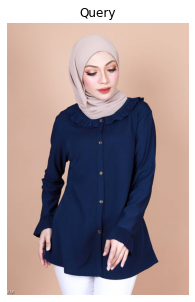

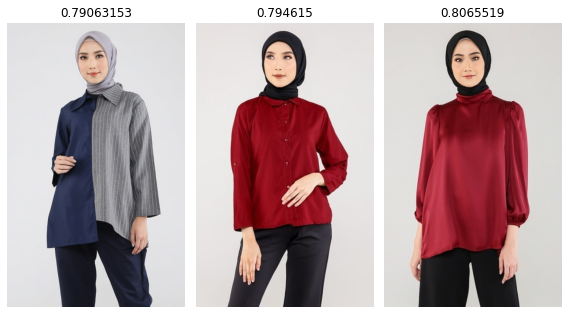

In [22]:
# Insert the image query
img = Image.open("/content/drive/MyDrive/Classroom/TKC/query/test_blus_navy.jpg")

# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[3:]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the query
fig = plt.figure(figsize=(5,5))
plt.axis('off')
plt.title('Query')
plt.imshow(img)
plt.show()

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))

for a in range(1*3):
    score = scores[a]
    axes.append(fig.add_subplot(1, 3, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
    
fig.tight_layout()
plt.show()

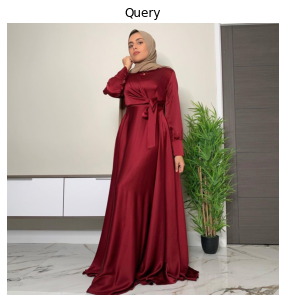

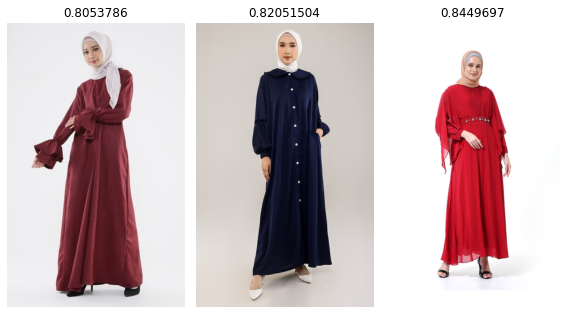

In [23]:
# Insert the image query
img = Image.open("/content/drive/MyDrive/Classroom/TKC/query/test_gamis_merah.jpg")

# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:3]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the query
fig = plt.figure(figsize=(5,5))
plt.axis('off')
plt.title('Query')
plt.imshow(img)
plt.show()

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))

for a in range(1*3):
    score = scores[a]
    axes.append(fig.add_subplot(1, 3, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
    
fig.tight_layout()
plt.show()

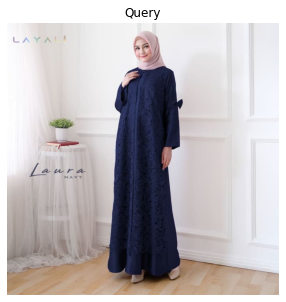

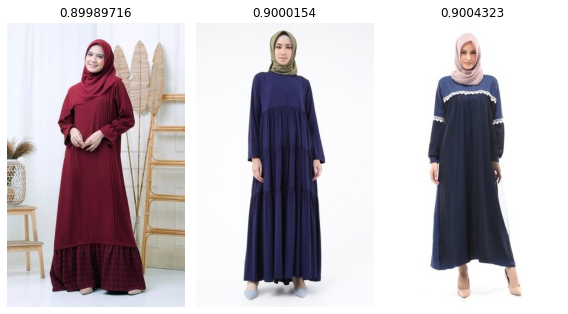

In [24]:
# Insert the image query
img = Image.open("/content/drive/MyDrive/Classroom/TKC/query/test_gamis_biru.jpg")

# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:3]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the query
fig = plt.figure(figsize=(5,5))
plt.axis('off')
plt.title('Query')
plt.imshow(img)
plt.show()

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))

for a in range(1*3):
    score = scores[a]
    axes.append(fig.add_subplot(1, 3, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
    
fig.tight_layout()
plt.show()